In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from PIL import Image

In [2]:
# Define the root directories for training and testing
train_dir = 'C:/Users/Patrik/Desktop/Files/fei/Ing/2nd class/HNS/project/Dataset_Znacky/Train-adj-train-test/train'
test_dir = 'C:/Users/Patrik/Desktop/Files/fei/Ing/2nd class/HNS/project/Dataset_Znacky/Train-adj-train-test/test'
num_classes = len(os.listdir(train_dir))

# Define transforms for data augmentation and normalization
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create custom datasets for training and testing
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Load the pre-trained AlexNet model
model = models.alexnet(pretrained=True)

for param in model.features.parameters():
    param.requires_grad = False
    
# Update the output layer to match the number of classes in your dataset
num_classes = 12  # Replace with the actual number of classes in your dataset
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, num_classes)

c:\Users\Patrik\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Patrik\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


Epoch 1/20, Training Loss: 0.8356866475367388, Validation Loss: 0.7134059270734296
Epoch 2/20, Training Loss: 0.6272127940560018, Validation Loss: 0.6493420259040945
Epoch 3/20, Training Loss: 0.5578860327502749, Validation Loss: 0.5819174939711742
Epoch 4/20, Training Loss: 0.5176423713663556, Validation Loss: 0.5495716672609834
Epoch 5/20, Training Loss: 0.48492702924652603, Validation Loss: 0.5317115438184427
Epoch 6/20, Training Loss: 0.46837008064551067, Validation Loss: 0.509347632723203
Epoch 7/20, Training Loss: 0.44754332336566305, Validation Loss: 0.5044914624598973
Epoch 8/20, Training Loss: 0.437429830767461, Validation Loss: 0.4793862850624411
Epoch 9/20, Training Loss: 0.4240340979190062, Validation Loss: 0.46993308691033986
Epoch 10/20, Training Loss: 0.413632307917077, Validation Loss: 0.46288716073476655
Epoch 11/20, Training Loss: 0.41669319383059905, Validation Loss: 0.4588109296801336
Epoch 12/20, Training Loss: 0.3941170719186991, Validation Loss: 0.432823608889628

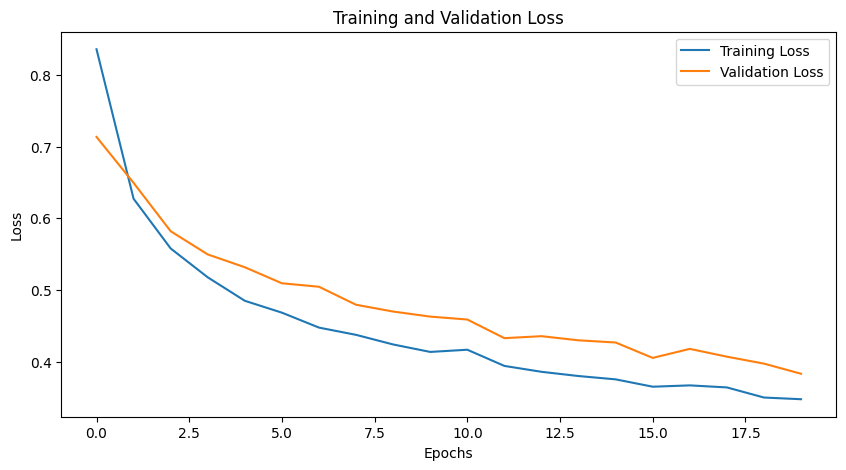

In [4]:
import torch.optim as optim
import torch
import matplotlib.pyplot as plt

# Assuming you've already defined your model, criterion, train_loader, and test_loader

# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001, momentum=0.9)

# Choose the right device based on availability of CUDA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    with torch.no_grad():  # Gradient computation is not needed for validation
        for val_inputs, val_labels in test_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()
    
    val_loss = val_running_loss / len(test_loader)
    val_losses.append(val_loss)

    # Print losses
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss}, Validation Loss: {val_loss}")

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [5]:
# Test the model on the testing data
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 86.03%


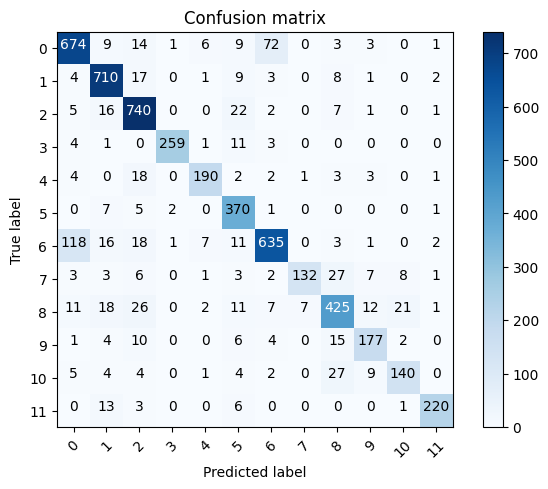

In [8]:
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(int(cm[i, j]), 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
confusion_matrix = np.zeros((num_classes, num_classes))
with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device)
        outputs = model(data)
        _, predicted = outputs.max(1)
        for t, p in zip(targets.view(-1), predicted.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

plot_confusion_matrix(confusion_matrix, list(range(num_classes)))